# Projectile launch: angles to hit a target
This code ilustrates two-dimensional particle kinematics by studying classical projectile launch.

By:
**Juan A. Ramírez Macías**  
*Mech. Eng. Professor*  
*Universidad Pontificia Bolivariana*

![ProjectileTwoAngles](./img/projectileLaunchTwoAngles.png)

## Modules import

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

## Quadratic equation solution
This problem requires solving a quadratic equation. 
The general solution to the quadratic equation $a u ^ 2 + b u + c = 0$ is given by
$$u_{1,2} = -\frac{b}{2a} \pm \frac{\sqrt{b^2 - 4ac}}{2a}$$
The function below solves the problem for any given $a$, $b$, and $c$.

In [2]:
# Function to solve a quadratic equation
def quadratic_solve(a, b, c):
    discr = b ** 2 - 4. * a * c
    sigma = b / 2. / a
    omega = np.sqrt(discr) / 2. / a
    if discr < 0:
        print "Complex solution"
    x1 = - sigma + omega
    x2 = - sigma - omega
    return x1, x2

## Problem's inputs
The inputs to the problem are
- Initial launch velocity: $v_0$
- Target horizontal distance: $d_x$
- Target vertical distance: $d_y$
- Acceleration due to gravity: $g$

In [3]:
# Launch velocity
v0 = 400. # m/s
# Coordinates to target
dx = 5.0e3 # m 
dy = 1.5e3 # m
# Gravity acceleration
g = 9.8 # m/s^2

## Solution to the problem
In the problem $x$-direction is positive right and $y$-direction is positive up.

![ProjectileTwoAngles](./img/projectileLaunchTwoAngles.png)

The projectile is lauched at a speed $v_0$ and angle $\theta$ with respect to the horizontal. In this case, the trajectory described by the projectile as a function of time is given by
- $x(t) = x_0 + v_0 \cos(\theta) t$
- $y(t) = y_0 + v_0 \sin(\theta) t - \frac{1}{2} g t ^ 2.$

Let us make the following assumptions:
- The projectile is lauched from $x_0 = 0$ and $y_0 = 0$.
- We want to hit a target that is located at coordinates $x = d_x$ and $y = d_y$.

We can write from the $x$ equation that
$$t = \frac{d_x}{v_0 \cos (\theta)},$$
which is the time to hit the target.

This can be replaced into the $y$ equation, and the result is
$$d_y = v_0 \sin(\theta) \left( \frac{d_x}{v_0 \cos (\theta)} \right) - \frac{1}{2} g \left( \frac{d_x}{v_0 \cos (\theta)} \right)^ 2.$$
Rearranging we get
$$d_y v_0^2 \cos^2 (\theta) - d_x v_0^2 \sin(\theta) \cos (\theta) + \frac{1}{2} g^2 d_x^2 = 0.$$
This is an equation we need to solve for $\theta$.

This equation could be solved numerically, but an analytical solution is possible as well. To find an analytic solution we acknowledge that $\sin(\theta) = \sqrt{1 - \cos^2 (\theta)}$, assuming that $0 < \theta < \pi/2$.

From this, the equation is:
$$d_y v_0^2 \cos^2 (\theta) - d_x v_0^2 \cos (\theta) \sqrt{1 - \cos^2 (\theta)} + \frac{1}{2} g^2 d_x^2 = 0.$$
To find a solution we can arrange the equation as follows
$$d_y v_0^2 \cos^2 (\theta) + \frac{1}{2} g^2 d_x^2 = d_x v_0^2 \cos (\theta) \sqrt{1 - \cos^2 (\theta)};$$
then uniformily use the square
$$\left(d_y v_0^2 \cos^2 (\theta) + \frac{1}{2} g^2 d_x^2 \right)^2 = \left(d_x v_0^2 \cos (\theta) \sqrt{1 - \cos^2 (\theta)}\right)^2,$$
$$
d_y^2 v_0^4 \cos^4 (\theta) + d_y d_x^2  v_0^2  g  \cos^2 (\theta) + \frac{1}{4} g^2 d_x^4 = d_x^2 v_0^4 \cos^2 (\theta)  - d_x^2 v_0^4 \cos^4 (\theta);
$$
and then group similar terms
$$\left(d_y^2 v_0^4 + d_x^2 v_0^4 \right) \cos^4 (\theta) + \left(d_y d_x^2 v_0^2 g - d_x^2 v_0^4 \right) \cos^2 (\theta) + \frac{1}{4} g^2 d_x^4 =  0.$$

This is a quadratic equation if we define $u = \cos^2(\theta)$.

The equation is then  $a u ^ 2 + b u + c = 0,$ with
- $a = d_y^2 v_0^4 + d_x^2 v_0^4,$
- $b = d_y d_x^2 v_0^2 g - d_x^2 v_0^4, \quad \textrm{and}$
- $c = \frac{1}{4} g^2 d_x^4.$

Considering the general solution
$$u_{1,2} = -\frac{b}{2a} \pm \frac{\sqrt{b^2 - 4ac}}{2a},$$
we can find that
$$\theta_{1,2} = \cos^{-1} \left( \sqrt{u_{1,2}} \right).$$

In [4]:
# Coefficients
a = (dy ** 2 + dx ** 2) * v0 ** 4
b = dy * v0 ** 2 * g * dx ** 2 - dx ** 2 * v0 ** 4
c = g ** 2 * dx ** 4 / 4.
# Quadratic solution
sol1, sol2 = quadratic_solve(a, b, c)
# Angles solution
theta1 = np.arccos(np.sqrt(sol1))
theta2 = np.arccos(np.sqrt(sol2))
print "Angle 1:", theta1 * 180. / np.pi, "deg"
print "Angle 2:", theta2 * 180. / np.pi, "deg"

Angle 1: 26.0988912383 deg
Angle 2: 80.6003529957 deg


## Trajectories computation
To check if the computation was good, we plot the trajectories for the two angles:
- $x(t) = x_0 + v_0 \cos(\theta) t$
- $y(t) = y_0 + v_0 \sin(\theta) t - \frac{1}{2} g t ^ 2.$

First angle:

In [5]:
# Time to hit target
t1_hit = dx / v0 / np.cos(theta1)
dt = 0.01
print "Launch time (angle1):", t1_hit, "s"
# Time array in seconds
t1 = np.arange(0.,t1_hit + dt, dt)
# Position in meters
x1 = v0 * np.cos(theta1) * t1
y1 = v0 * np.sin(theta1) * t1 - 0.5 * g * t1 ** 2 
# Velocity in m/s
Vx1 = v0 * np.cos(theta1) * np.ones_like(t1)
Vy1 = v0 * np.sin(theta1) - g * t1

Launch time (angle1): 13.9192624348 s


Second angle:

In [6]:
# Time to hit target
t2_hit = dx / v0 / np.cos(theta2)
print "Launch time (angle2):", t2_hit, "s"
# Time array in seconds
t2 = np.arange(0.,t2_hit + dt, dt)
# Position in meters
x2 = v0 * np.cos(theta2) * t2
y2 = v0 * np.sin(theta2) * t2 - 0.5 * g * t2 ** 2 
# Velocity in m/s
Vx2 = v0 * np.cos(theta2) * np.ones_like(t2)
Vy2 = v0 * np.sin(theta2) - g * t2

Launch time (angle2): 76.5369144997 s


## Trajectories plot

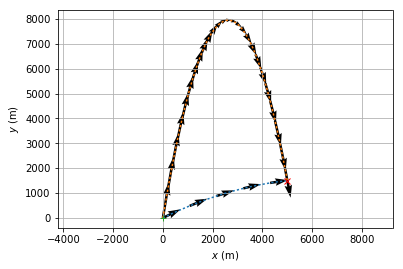

In [7]:
plt.figure()
# Trajectories plot
plt.plot(x1, y1, ':')
plt.plot(x2, y2, ':')
plt.plot(x1[0], y1[0], '+')
plt.plot(dx, dy, 'xr')
# Velocity field plot
Nd = 300
plt.quiver(x1[::Nd], y1[::Nd], Vx1[::Nd], Vy1[::Nd])
plt.quiver(x2[::Nd], y2[::Nd], Vx2[::Nd], Vy2[::Nd])
# Axes settings
plt.xlabel('$x$ (m)')
plt.ylabel('$y$ (m)')
plt.axis('equal')
plt.grid()
plt.show()